# Functionality of the Code

The three changes from the second code are:
1. Addition of Dropout at Each Layer
2. Introduction of Callbacks
3. Change of kernel size

# Importing the required libraries and required modules

This is the vanilla coda that is executed without any additional layers other than Convolution

In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.callbacks import LearningRateScheduler
from keras.models import Sequential
from keras.layers import Activation, Flatten, Add, BatchNormalization, Convolution2D, MaxPooling2D, Dropout
from keras.utils import np_utils
from keras.optimizers import Adam

from keras.datasets import mnist

import cv2

import numpy as np
import matplotlib.pyplot as plt

### Loading the MNIST Dataset

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

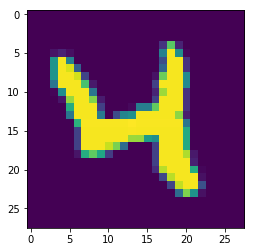

In [4]:
plt.imshow(x_train[20])

In [0]:
xtrain = x_train.reshape(x_train.shape[0], 28, 28,1)
xtest = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [0]:
xtrain /= 255.0
xtest /= 255.0

In [0]:
ytrain = np_utils.to_categorical(y_train, 10)
ytest = np_utils.to_categorical(y_test, 10)

In [34]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(14, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 7, 7))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (7, 7))`


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_24 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_24 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 26, 26, 10)        170       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 10)        0         
__________

In [0]:
def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.003), 
              metrics=['accuracy'])

In [38]:
model.fit(xtrain, ytrain, batch_size=32, nb_epoch=30, verbose=1, validation_data=(xtest, ytest), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 27s 451us/step - loss: 0.4477 - acc: 0.8825 - val_loss: 0.0967 - val_acc: 0.9787
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 24s 392us/step - loss: 0.1991 - acc: 0.9443 - val_loss: 0.0640 - val_acc: 0.9858
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 24s 404us/step - loss: 0.1570 - acc: 0.9570 - val_loss: 0.0432 - val_acc: 0.9894
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 24s 401us/step - loss: 0.1403 - acc: 0.9619 - val_loss: 0.0340 - val_acc: 0.9909
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(xtest, ytest, verbose=0)

In [40]:
print(score)

[0.02227204295732081, 0.9937]
